In [1]:
%matplotlib inline

In [2]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import random
import pickle
from collections import Counter
from nltk.stem import WordNetLemmatizer
import torch
import torch.nn as nn
import torchvision

lemmatizer = WordNetLemmatizer()
hm_lines = 1000000


def read_lexicon():
    global lexicon 

    lexi = open("lexicon.pickle" , 'rb')
    lexicon = pickle.load(lexi)
    
    return lexicon
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
ip_size , op_size = 431 ,  2

class NN(nn.Module):
    def __init__(self , ip_size , op_size):
        super().__init__()
        
        self.fc1 = nn.Linear(ip_size , 1000)
        self.fc2 = nn.Linear(1000 , 3000)
        self.fc3 = nn.Linear(3000 , 300)
        self.fc4 = nn.Linear(300 ,op_size)
        self.relu = nn.ReLU()
        
    def forward(self , x):
        x = self.fc1(x)
        x = self.fc2(self.relu(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        
        return x

In [4]:
model_loaded = torch.load("NNmodel.pt")

In [5]:
def user_test(sample , lexicon):
    
    c_w = word_tokenize(sample.lower())
    c_w = [lemmatizer.lemmatize(i) for i in c_w]
    samples = np.zeros(len(lexicon))
    for  word in c_w:
        if word.lower() in lexicon:
            index_value = lexicon.index(word.lower())
            samples[index_value] += 1
            
    samples = list(samples)  
    output = []
    output.append(samples)
    output = np.array(output)
    return output

def predict_data(data ):
    lexicon = read_lexicon()
    data  = user_test(data , lexicon)
    data = torch.from_numpy(data)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data = data.to(device)
    data = data.float()
    predict = model_loaded(data)
#     print(predict[0])
#     p = predict.cpu()
#     p  = p.detach().numpy()
#     p = str(p[0])
#     p = p.split()
#     p.remove(']')
# #     p = p.
#     print(p)
    prediction = torch.max(predict , 1) [1]
    result = prediction.cpu()
    result  = result.numpy()
#     if int(result) == 0:
#         print("--------------------------")
#         print( "Positive")
#         print("--------------------------")
#     elif int(result) == 1:
#         print("--------------------------")
#         print("Negative")
#         print("--------------------------")
#     else:
#         print(int(result) , "Got this value")
        
    return int(result)
    

In [6]:
# data = input()
# result =  predict_data(data)


# Web Scrapping

In [7]:
 # Get link of the review page

In [8]:
import matplotlib.pyplot as plt
import numpy as np
def plot(total , pos , neg , title):
    plt.style.use('ggplot')

    slices = [pos,neg]
    activities = ['positive' , 'negative']


    plt.pie(slices,
            labels=activities,
            startangle=90,
            shadow= True,
            explode=(0.1,0),
            autopct='%1.1f%%')

    plt.title(f"Review for {title}")
    plt.show()

    plt.style.use('ggplot')
    
    
    x_pos = np.arange(len(slices))
    plt.bar(x_pos, slices, color=['#7ed6df','red'])
    plt.xlabel("Classification")
    plt.ylabel("Count")
    plt.title(f"Review for {title} ")
    plt.xticks(x_pos, activities)
    plt.show()

In [9]:
# link = 
from string import punctuation
import requests
from bs4 import BeautifulSoup

title = None
def give_review(link):
    
    result  = requests.get(link) 
    soup = BeautifulSoup(result.content)
    global title
    title = soup.find_all('div',{'class':['col-12-12']})[4]
    title = BeautifulSoup(str(title))
    title= title.find('span')
    title = title.text
    print(title)
    
    link_replaced = link.replace("/p/" , "/product-reviews/")
    # 5 review pages 
    val=5
    links_app = []
    for i in range(val):
        links_app.append(f'{link_replaced}&page={i+1}')


    data = ''
    data_got  = ''
    for i , link in enumerate(links_app):
        try :        
            result  = requests.get(link) 
            data = str(data + ' ' +str(result.content))
            soup = BeautifulSoup(result.content)
            mydivs = soup.find_all('div' , {"class" : ["col-12-12"]})
            data_got = f"{data_got} {mydivs} "
        except Exception as e:
            print(f"Error at link: {i+1} ::: {e}")

    fi = open('mydivs.html' , 'w')
    fi.write(data)
    fi.close()


#     img = BeautifulSoup(img)
    soup = BeautifulSoup(data_got)
    

    soup = BeautifulSoup(str(soup))
    table = soup.find_all('div' ,{"class":"row"})

    print("----------------")

    ps = list(soup.find_all('p'))
    ps.pop(0)


    p_review = []
    i = 0
    for _ in range(len(ps)):
    #     print("i = " ,i )
        try:
            p_review.append(ps[i])        
        except Exception as e:
            pass
        i +=4



    # fi = open('mydivs.html' , 'w')
    # fi.write(str(p_review))
    # fi.close()

    soup = BeautifulSoup(str(p_review))
    pt = []
    for p in soup.find_all('p'):
        pt.append(p.text)


    for i , p in enumerate(pt):
        if p in punctuation:
            pt.pop(i)

    positive = negative = neutral = 0
    total = len(pt)
    for p in pt:
        result = predict_data(p)
        if result == 0:
            positive += 1
        elif result == 1:
            negative +=1
        else:
            neutral +=1

    print(f"Total Review Analaysed = {len(pt)} \n Positive Review = {positive} \n Negative Review = {negative}")
    plot(total = total , pos = positive ,neg= negative , title = title)
    


Processing..
Kitchen Design CHAKLA BELAN STAND Stainless Steel Kitchen Rack  (Silver)
----------------
Total Review Analaysed = 100 
 Positive Review = 78 
 Negative Review = 22


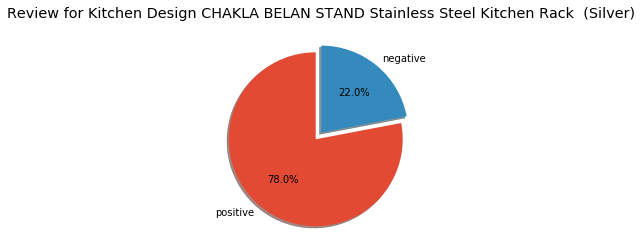

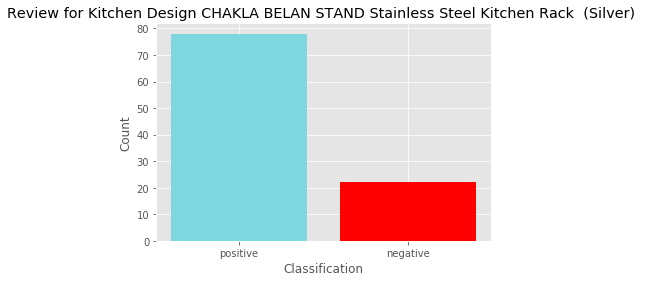

Total Time Taken: 12 Seconds


In [10]:
import validators

from ipywidgets import interact, widgets
from IPython.core.display import display, HTML

from IPython.display import display
from IPython.display import clear_output

from IPython.display import HTML, display

display(HTML("""<h1>Bukku The AI</h1>
             <h3>Flipkart Assistant</h3>
             <br>
             <br>
             <h4> Paste thr product link you want to get review</h4>
            """ ))

box = widgets.Text(description="paste link here")
display(box)

button = widgets.Button(description="Ask Bukku!")
display(button)


def validate(link):
    if not validators.url(link):
        print("String Not valid")
    else:
        print("Processing..")
        give_review(link)
#         display(HTML(img))

        


import time

def on_button_clicked(b):
    start = time.time()
    val = box.value
    clear_output()
    validate(val)
    end = time.time()
    print(f"Total Time Taken: {int(end -start)} Seconds")


button.on_click(on_button_clicked)





        
